In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [37]:
df = pd.read_csv('./thyroid_cancer_risk_data.csv')
warnings.simplefilter('ignore')

In [38]:
df.shape

(212691, 17)

In [39]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

Cleaning des Nan et duplicates

In [41]:
df.dropna(inplace=True)

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.drop(columns=['Patient_ID'], inplace=True)

Preview du dataset

In [44]:
df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [45]:
df.describe()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,51.918497,5.045102,2.001727,8.246204,2.503403
std,21.632815,2.860264,0.866248,2.164188,1.444631
min,15.000000,0.100000,0.500000,4.500000,0.000000
25%,33.000000,2.570000,1.250000,6.370000,1.250000
50%,52.000000,5.040000,2.000000,8.240000,2.510000
75%,71.000000,7.520000,2.750000,10.120000,3.760000
max,89.000000,10.000000,3.500000,12.000000,5.000000


## Génération des graphiques

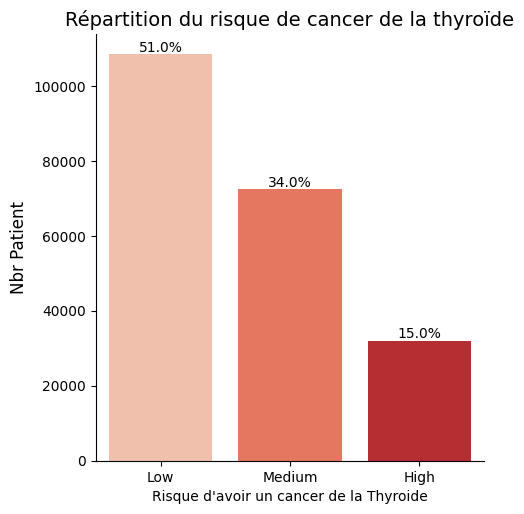

In [46]:
order = ['Low', 'Medium', 'High']
colors = sns.color_palette('Reds', len(order))

ax = sns.catplot(data=df, x='Thyroid_Cancer_Risk', kind='count', hue='Thyroid_Cancer_Risk', palette=dict(zip(order, colors)), order=order, legend=False)
# ax = sns.catplot(data=df, x='Thyroid_Cancer_Risk', kind='count', hue='Thyroid_Cancer_Risk', order=order, legend=False)
ax.ax.set_ylabel('Nbr Patient', fontsize=12)
ax.ax.set_xlabel('Risque d\'avoir un cancer de la Thyroide')
ax.ax.set_title('Répartition du risque de cancer de la thyroïde', fontsize=14)
for p in ax.ax.patches:
    height = p.get_height()  
    total = len(df) 
    percentage = f'{100 * height / total:.1f}%'  
    ax.ax.text(p.get_x() + p.get_width() / 2, height, percentage, ha='center', va='bottom', fontsize=10, color='black')
plt.show()

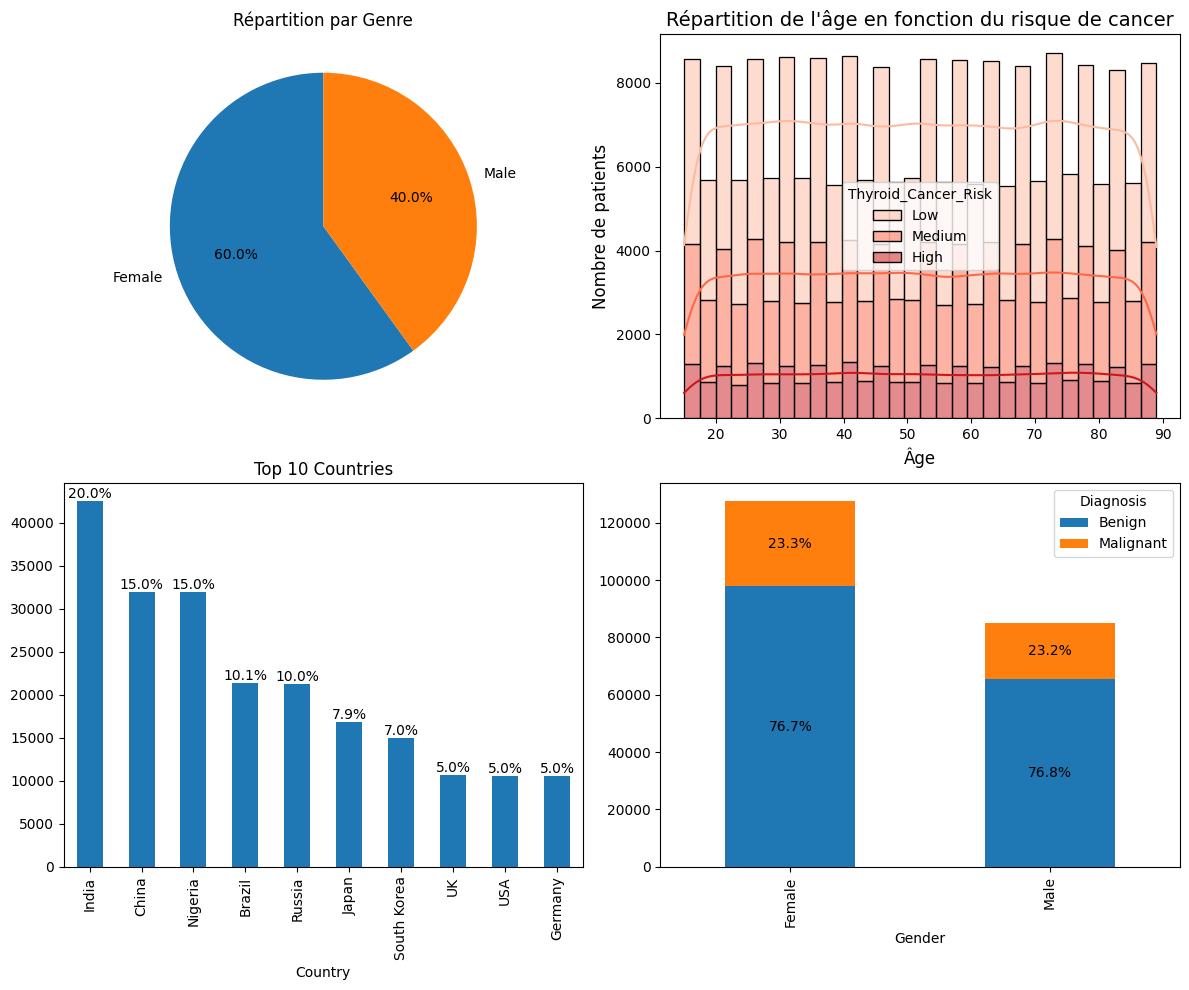

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Répartition des risques de cancer par genre
colors = ['#1f77b4', '#ff7f0e']  
gender_counts = df['Gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)  # ✅ Correction ici
axes[0, 0].set_title("Répartition par Genre")


# Répartition des risques de cancer par tranche d'age
sns.histplot(data=df, x="Age", hue="Thyroid_Cancer_Risk", multiple="stack", kde=True, palette="Reds", bins=30, ax=axes[0, 1])
axes[0, 1].set_title("Répartition de l'âge en fonction du risque de cancer", fontsize=14)
axes[0, 1].set_xlabel("Âge", fontsize=12)
axes[0, 1].set_ylabel("Nombre de patients", fontsize=12)



# Répartition des risques de cancer par Pays
df['Country'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0])
total = df['Country'].value_counts().sum()
for p in axes[1, 0].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axes[1, 0].annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
axes[1, 0].set_title('Top 10 Countries')


# Répartition du risque de cancer par genre
gender_risk_counts = df.groupby(["Gender", "Diagnosis"]).size().unstack()
plot = gender_risk_counts.plot(kind="bar", stacked=True, ax=axes[1, 1])
totals = gender_risk_counts.sum(axis=1) 
for p in axes[1,1].patches:
    gender_index = int(p.get_x() + 0.5)  # Approximation pour récupérer l'index du genre
    total = totals.iloc[gender_index]
    if total > 0:  # Éviter une division par zéro
        percentage = f'{100 * p.get_height() / total:.1f}%'
        axes[1, 1].annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=10, color='black')
    

# Affichage des graphiques
plt.tight_layout()
plt.show()

In [48]:
#données homogénéisées mais cohérentes au vu des différentes statistiques disponibles sur les différents sites des gouvernements.
#Voir ci contre : https://pmc.ncbi.nlm.nih.gov/articles/PMC8986939/#:~:text=5%2C%209%5D.-,Results,among%20females%20(Table%201).

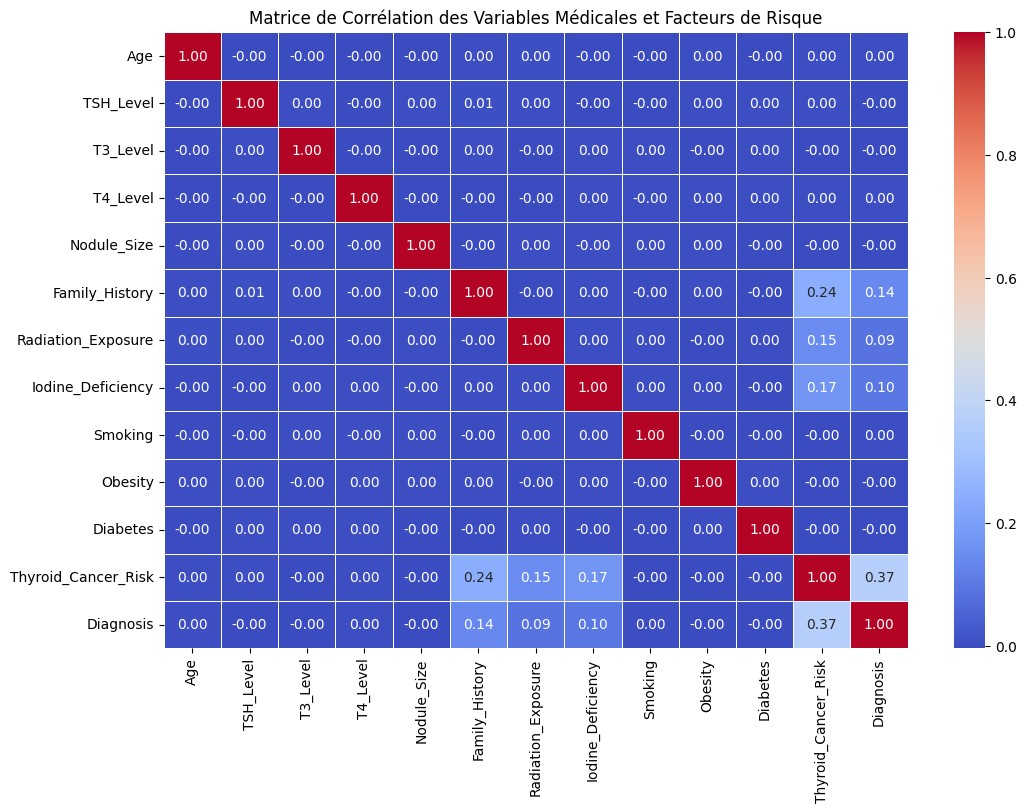

In [56]:
binary_columns = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                  'Smoking', 'Obesity', 'Diabetes']
df_encoded = df.copy()
df_encoded[binary_columns] = df_encoded[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_encoded['Thyroid_Cancer_Risk'] = df_encoded['Thyroid_Cancer_Risk'].map(risk_mapping)
diagnosis_mapping = {'Benign': 0, 'Malignant': 1}
df_encoded['Diagnosis'] = df_encoded['Diagnosis'].map(diagnosis_mapping)

numeric_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size', 
                'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis']

corr_matrix = df_encoded[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation des Variables Médicales et Facteurs de Risque")
plt.show()

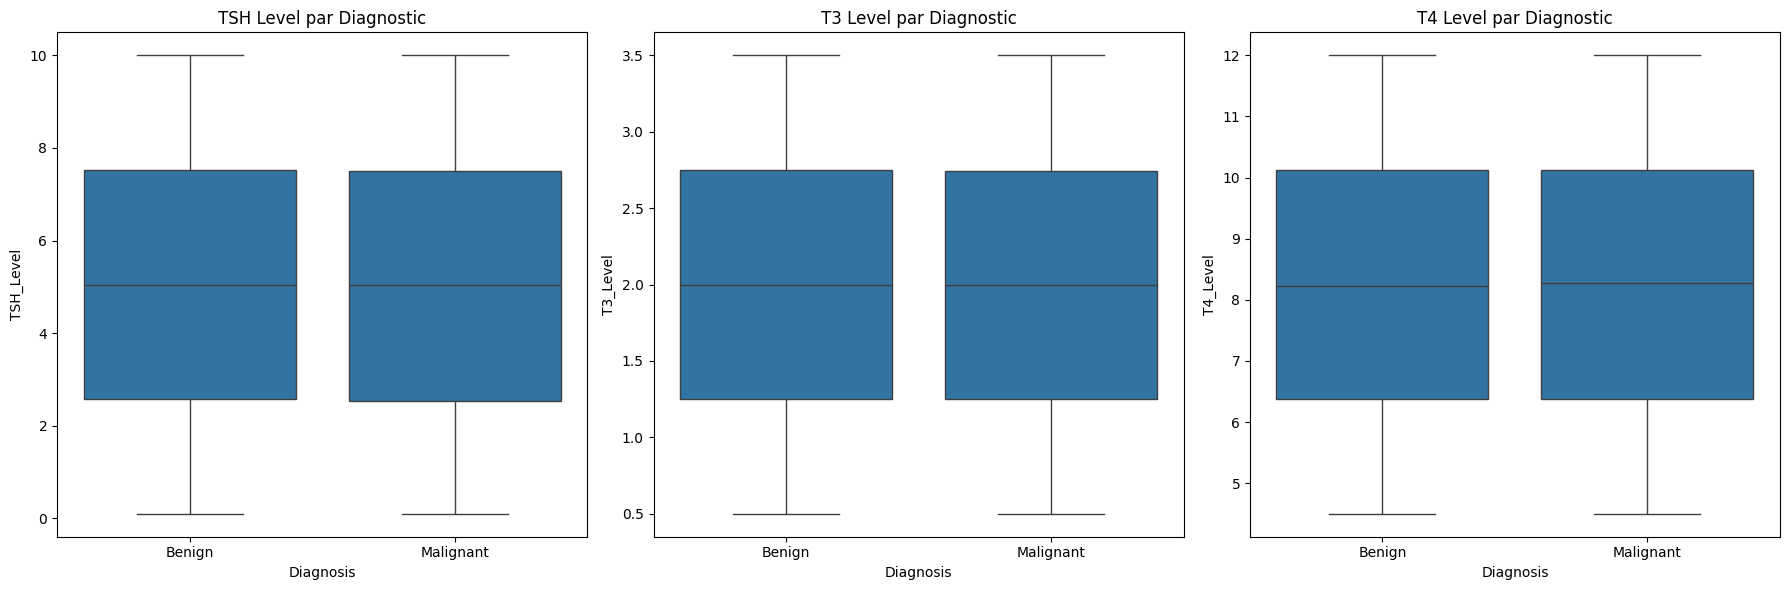

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# TSH Level vs Diagnosis
sns.boxplot(x='Diagnosis', y='TSH_Level', data=df, ax=axes[0])
axes[0].set_title('TSH Level par Diagnostic')

# T3 Level vs Diagnosis
sns.boxplot(x='Diagnosis', y='T3_Level', data=df, ax=axes[1])
axes[1].set_title('T3 Level par Diagnostic')

# T4 Level vs Diagnosis
sns.boxplot(x='Diagnosis', y='T4_Level', data=df, ax=axes[2])
axes[2].set_title('T4 Level par Diagnostic')

plt.tight_layout()
plt.show()

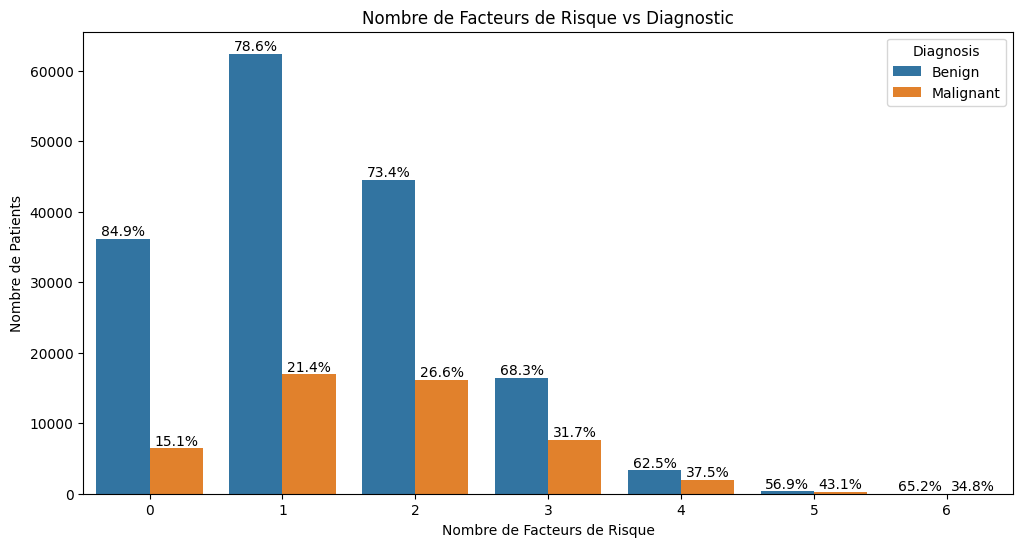

In [52]:
risk_factors = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                'Smoking', 'Obesity', 'Diabetes']

df['Risk_Factor_Count'] = (df[risk_factors] == 'Yes').sum(axis=1)


plt.figure(figsize=(12, 6))
sns.countplot(x='Risk_Factor_Count', hue='Diagnosis', data=df)
plt.title('Nombre de Facteurs de Risque vs Diagnostic')
plt.xlabel('Nombre de Facteurs de Risque')
plt.ylabel('Nombre de Patients')

for i in range(df['Risk_Factor_Count'].nunique()):
    total = sum(df['Risk_Factor_Count'] == i)
    for j, diagnosis in enumerate(['Benign', 'Malignant']):
        count = sum((df['Risk_Factor_Count'] == i) & (df['Diagnosis'] == diagnosis))
        if total > 0:
            percentage = 100 * count / total
            plt.text(i + j*0.4 - 0.2, count + 10, f'{percentage:.1f}%', 
                     ha='center', va='bottom')

plt.show()

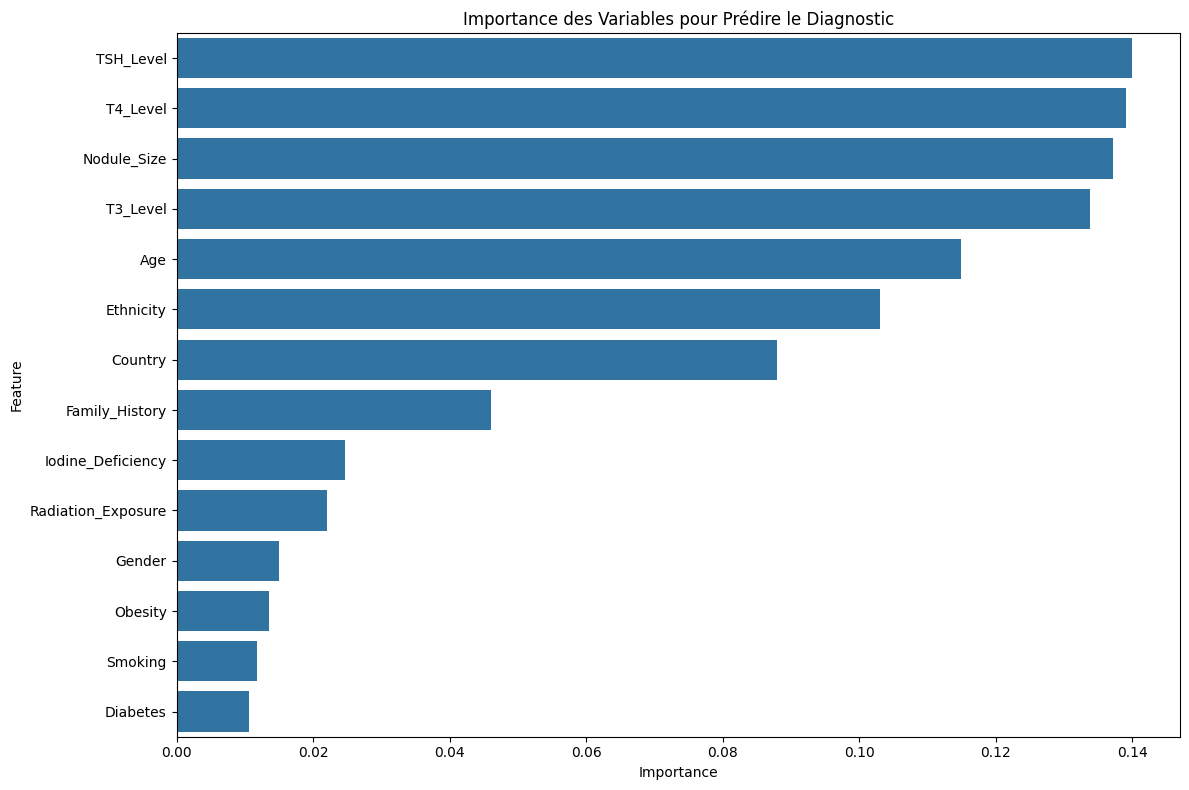

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'Country', 'Ethnicity', 'Family_History', 
                   'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 
                   'Obesity', 'Diabetes']

df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

# Sélectionner features
X_features = df_encoded[features + categorical_cols]
y = (df_encoded['Diagnosis'])

# Entraîner un RandomForest pour voir l'importance des variables
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_features, y)

# Visualiser l'importance des variables
importance_df = pd.DataFrame({
    'Feature': X_features.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importance des Variables pour Prédire le Diagnostic')
plt.tight_layout()
plt.show()

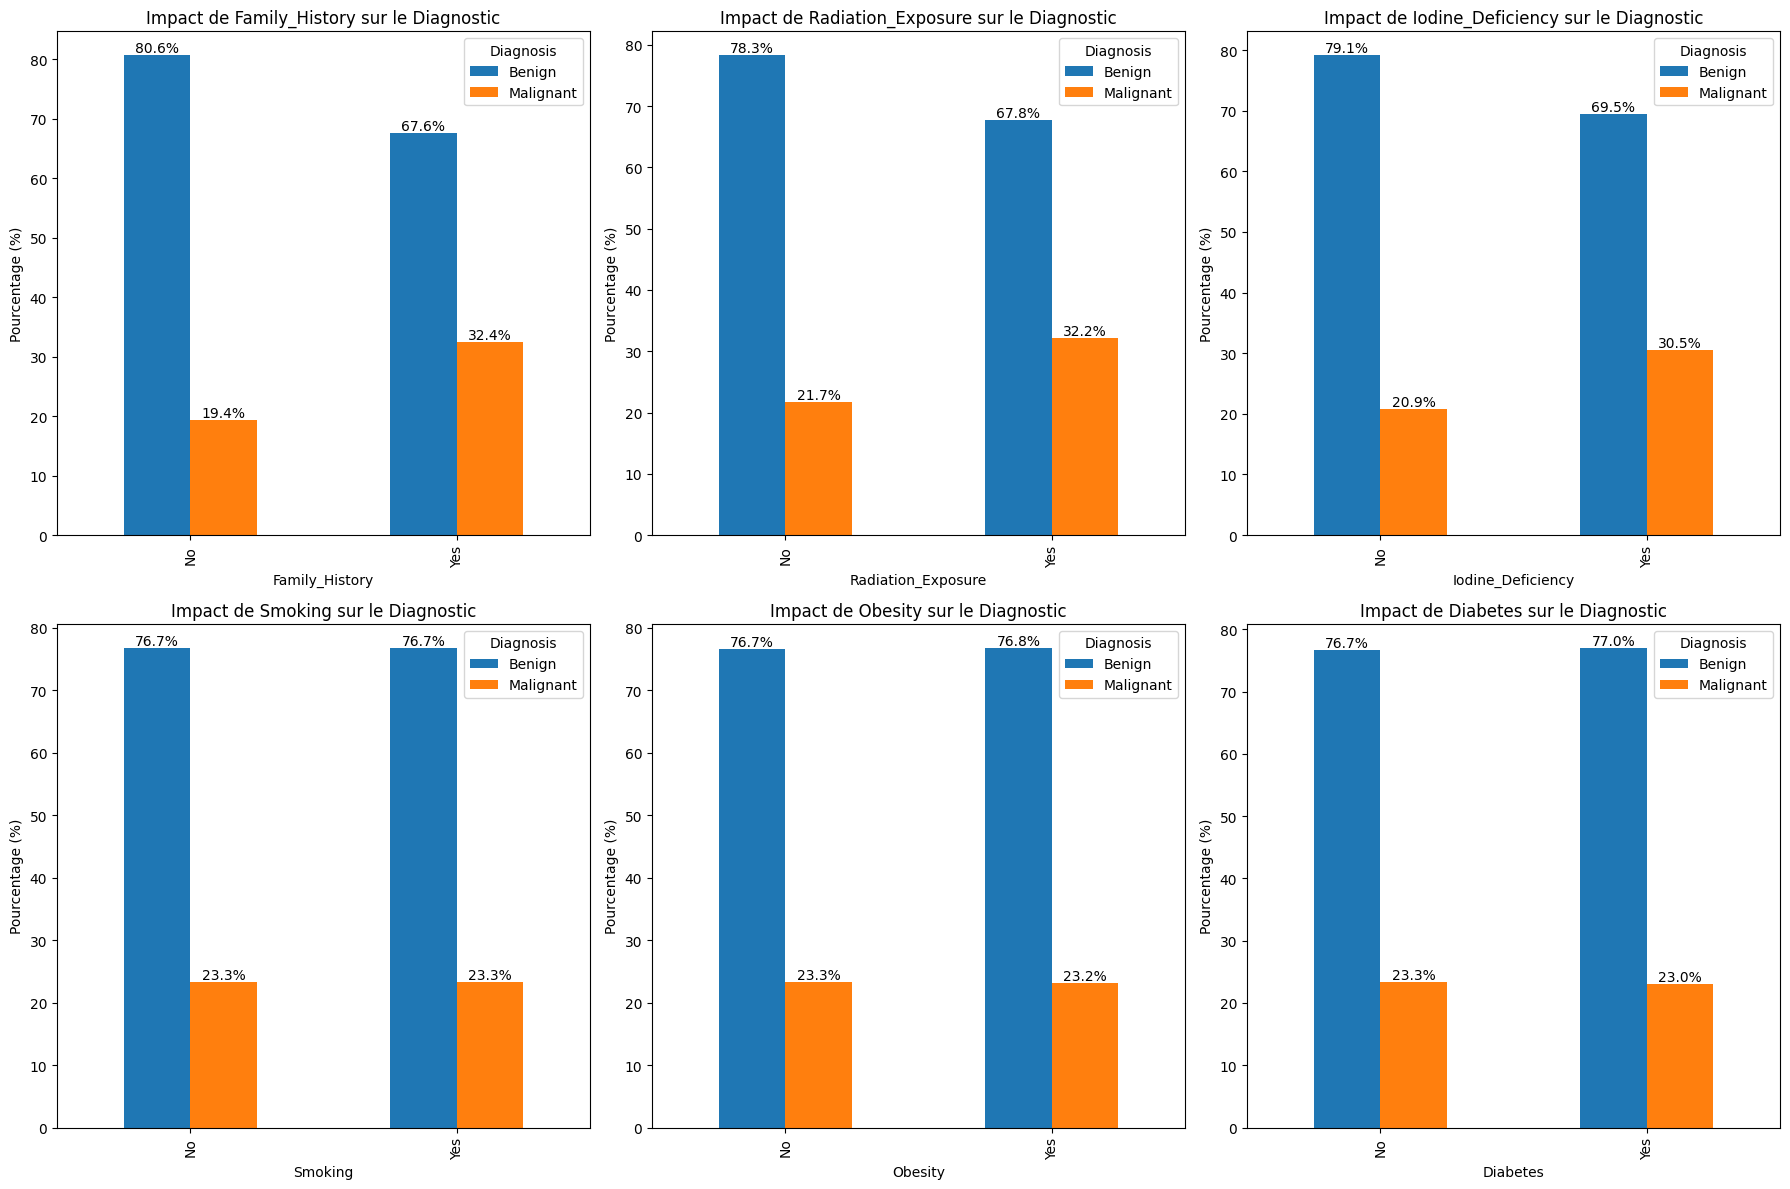

In [ ]:
# Convertir les colonnes Yes/No en 0/1 pour faciliter l'analyse
risk_factors = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                'Smoking', 'Obesity', 'Diabetes']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, factor in enumerate(risk_factors):
    crosstab = pd.crosstab(df[factor], df['Diagnosis'], normalize='index') * 100
    crosstab.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Impact de {factor} sur le Diagnostic')
    axes[i].set_ylabel('Pourcentage (%)')
    
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.1f}%', 
                         (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha='center', va='bottom')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, "Impact de l'historique familial\n sur le diagnostique de cancer")

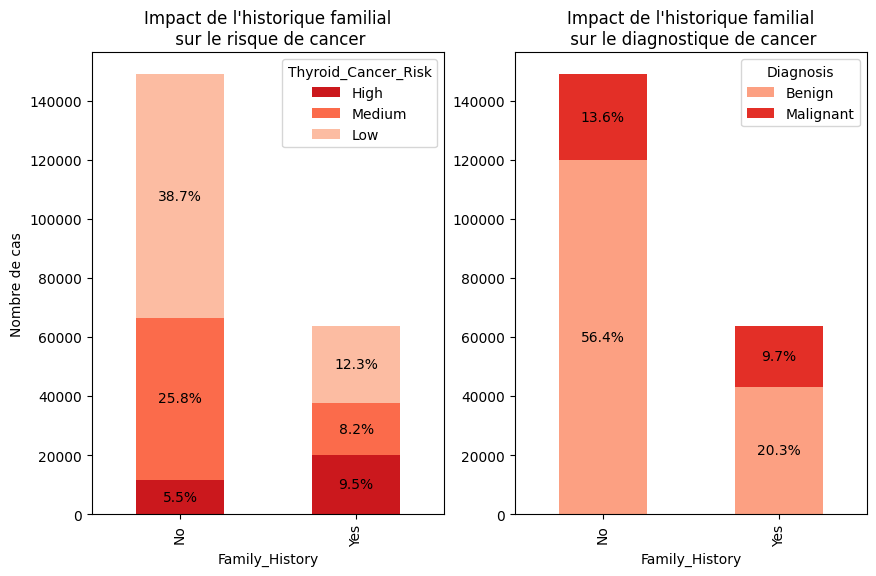

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
order = ["High", "Medium", "Low"]  
colors = sns.color_palette("Reds_r", n_colors=3)  


inheritance_risk_counts = df.groupby(['Family_History', 'Thyroid_Cancer_Risk']).size().unstack()
inheritance_risk_counts = inheritance_risk_counts.reindex(columns=order)
inheritance_risk_counts.plot(kind='bar', stacked=True, color=colors, ax=axes[0])


for patches in axes[0].patches:
    height = patches.get_height()
    if height > 0:  
        percentage = f'{100 * height / inheritance_risk_counts.sum().sum():.1f}%'
        axes[0].annotate(percentage, (patches.get_x() + patches.get_width() / 2, patches.get_y() + height / 2), ha='center', va='center', fontsize=10, color='black')

axes[0].set_title('Impact de l\'historique familial\n sur le risque de cancer')
axes[0].set_ylabel('Nombre de cas')


# Impact familial sur le diagnostic du cancer
order = ['Benign', 'Malignant']
colors = sns.color_palette("Reds", n_colors=2)

inheritance_gravity = df.groupby(['Family_History', 'Diagnosis']).size().unstack()
inheritance_gravity = inheritance_gravity.reindex(columns=order)
inheritance_gravity.plot(kind='bar', stacked=True, color=colors, ax=axes[1])

for patches in axes[1].patches:
    height = patches.get_height()
    if height > 0:  
        percentage = f'{100 * height / inheritance_gravity.sum().sum():.1f}%'
        axes[1].annotate(percentage, (patches.get_x() + patches.get_width() / 2, patches.get_y() + height / 2), ha='center', va='center', fontsize=10, color='black')
axes[1].set_title('Impact de l\'historique familial\n sur le diagnostique de cancer')

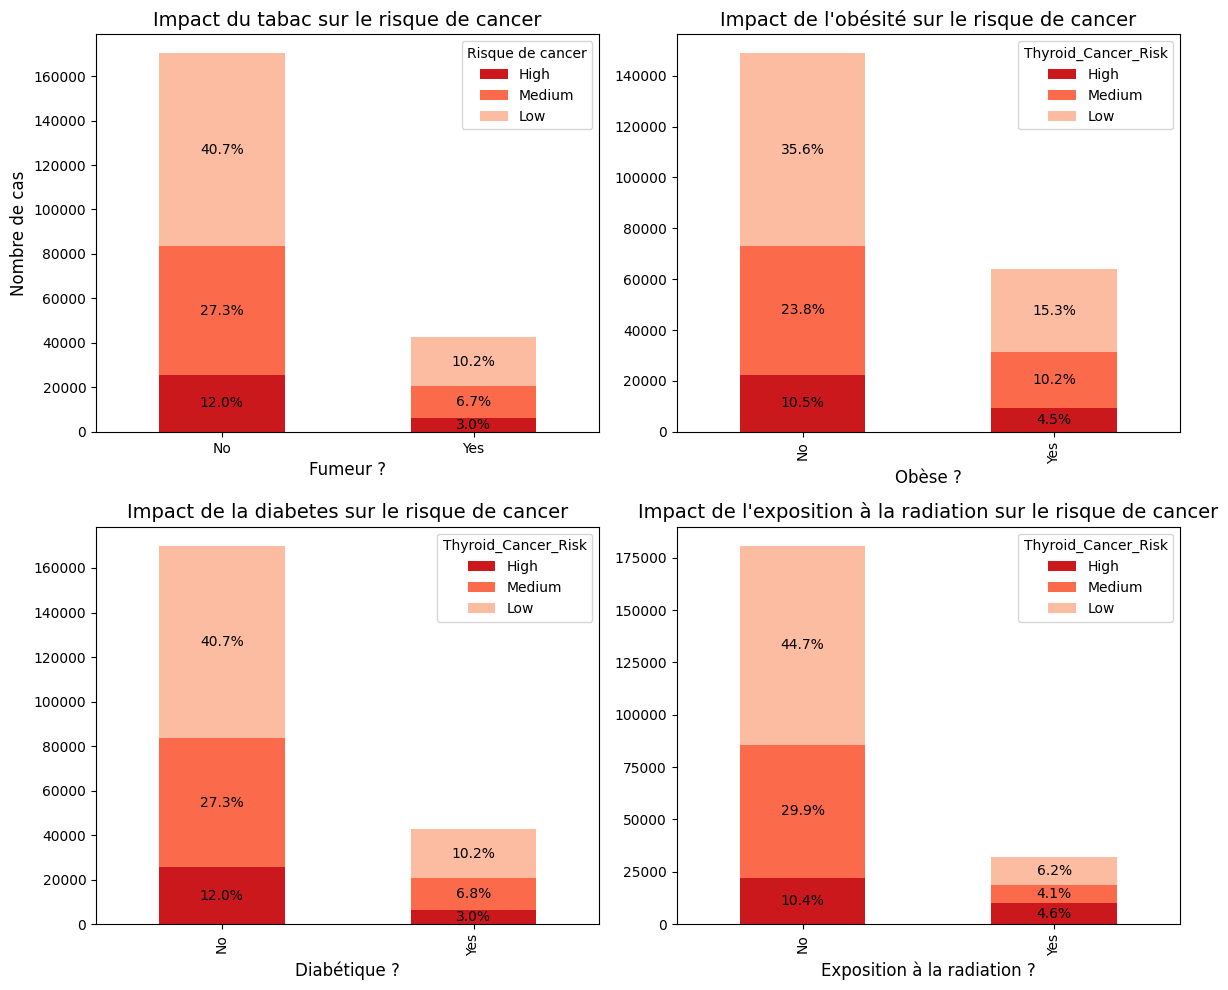

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Ordering & couleurs pour les graphiques
order = ["High", "Medium", "Low"]  
colors = sns.color_palette("Reds_r", n_colors=3)  

# Impact du tabac sur le risque de cancer
smoking_risk_counts = df.groupby(["Smoking", "Thyroid_Cancer_Risk"]).size().unstack()   
smoking_risk_counts = smoking_risk_counts.reindex(columns=order)
smoking_risk_counts.plot(kind="bar", stacked=True, color=colors, ax=axes[0, 0])
for container in axes[0, 0].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            percentage = f'{100 * height / df.shape[0]:.1f}%'
            axes[0, 0].annotate(percentage, 
                                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                                ha='center', va='center', fontsize=10, color='black')
axes[0, 0].set_title("Impact du tabac sur le risque de cancer", fontsize=14)
axes[0, 0].set_xlabel("Fumeur ?", fontsize=12)
axes[0, 0].set_ylabel("Nombre de cas", fontsize=12)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].legend(title="Risque de cancer")

# Impact de l'obésité sur le risque de cancer
obesity_risk_counts = df.groupby(["Obesity", "Thyroid_Cancer_Risk"]).size().unstack()
obesity_risk_counts = obesity_risk_counts.reindex(columns=order)
obesity_risk_counts.plot(kind="bar", stacked=True, color=colors, ax=axes[0, 1])

for container in axes[0, 1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            percentage = f'{100 * height / df.shape[0]:.1f}%'
            axes[0, 1].annotate(percentage, 
                                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                                ha='center', va='center', fontsize=10, color='black')
axes[0, 1].set_title("Impact de l'obésité sur le risque de cancer", fontsize=14)
axes[0, 1].set_xlabel("Obèse ?", fontsize=12)

# Impact du diabete sur le risque de cancer
diabetes_risk_counts = df.groupby(["Diabetes", "Thyroid_Cancer_Risk"]).size().unstack()
diabetes_risk_counts = diabetes_risk_counts.reindex(columns=order)
diabetes_risk_counts.plot(kind="bar", stacked=True, color=colors, ax=axes[1, 0])

for container in axes[1, 0].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            percentage = f'{100 * height / df.shape[0]:.1f}%'
            axes[1, 0].annotate(percentage, 
                                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                                ha='center', va='center', fontsize=10, color='black')
axes[1, 0].set_title("Impact de la diabetes sur le risque de cancer", fontsize=14)
axes[1, 0].set_xlabel("Diabétique ?", fontsize=12)


# Impact de l'exposition a la radiation sur le risque de cancer
radiation_exposure_counts = df.groupby(["Radiation_Exposure", "Thyroid_Cancer_Risk"]).size().unstack()
radiation_exposure_counts = radiation_exposure_counts.reindex(columns=order)
radiation_exposure_counts.plot(kind='bar', stacked=True, color=colors, ax=axes[1,1])

for container in axes[1, 1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            percentage = f'{100 * height / df.shape[0]:.1f}%'
            axes[1, 1].annotate(percentage, 
                                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                                ha='center', va='center', fontsize=10, color='black')

axes[1, 1].set_title("Impact de l'exposition à la radiation sur le risque de cancer", fontsize=14)
axes[1, 1].set_xlabel("Exposition à la radiation ?", fontsize=12)


plt.tight_layout()
plt.show()

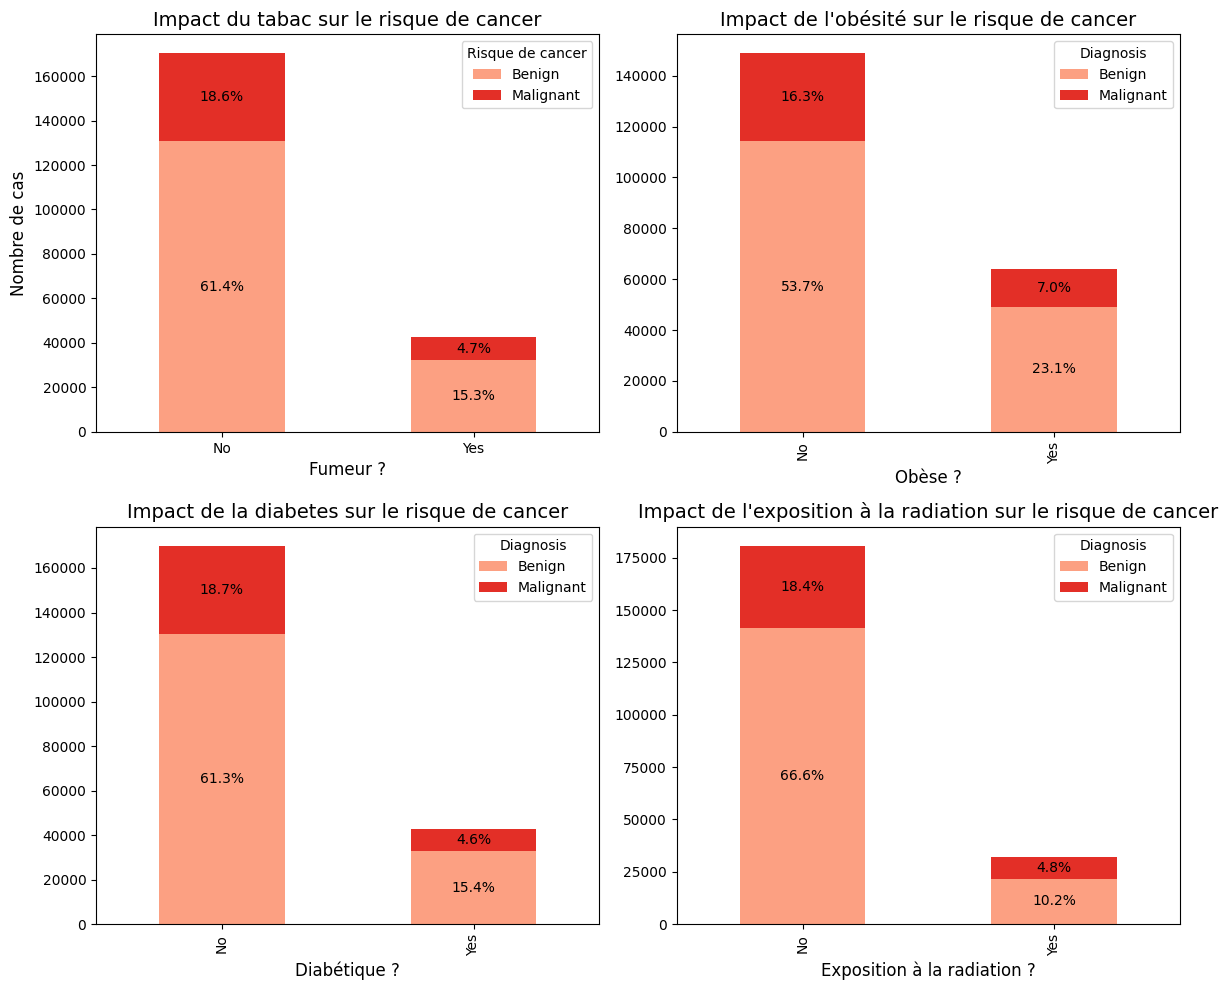

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Ordering & couleurs pour les graphiques
order = ['Benign', 'Malignant']
colors = sns.color_palette("Reds", n_colors=2)  


# Impact du tabac sur le risque de cancer
smoking_risk_counts = df.groupby(["Smoking", "Diagnosis"]).size().unstack()   
smoking_risk_counts = smoking_risk_counts.reindex(columns=order)
smoking_risk_counts.plot(kind="bar", stacked=True, color=colors, ax=axes[0, 0])
for container in axes[0, 0].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            percentage = f'{100 * height / df.shape[0]:.1f}%'
            axes[0, 0].annotate(percentage, 
                                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                                ha='center', va='center', fontsize=10, color='black')
axes[0, 0].set_title("Impact du tabac sur le risque de cancer", fontsize=14)
axes[0, 0].set_xlabel("Fumeur ?", fontsize=12)
axes[0, 0].set_ylabel("Nombre de cas", fontsize=12)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].legend(title="Risque de cancer")

# Impact de l'obésité sur le risque de cancer
obesity_risk_counts = df.groupby(["Obesity", "Diagnosis"]).size().unstack()

obesity_risk_counts = obesity_risk_counts.reindex(columns=order)
obesity_risk_counts.plot(kind="bar", stacked=True, color=colors, ax=axes[0, 1])

for container in axes[0, 1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            percentage = f'{100 * height / df.shape[0]:.1f}%'
            axes[0, 1].annotate(percentage, 
                                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                                ha='center', va='center', fontsize=10, color='black')
axes[0, 1].set_title("Impact de l'obésité sur le risque de cancer", fontsize=14)
axes[0, 1].set_xlabel("Obèse ?", fontsize=12)

# Impact de la diabetes sur le risque de cancer
diabetes_risk_counts = df.groupby(["Diabetes", "Diagnosis"]).size().unstack()
diabetes_risk_counts = diabetes_risk_counts.reindex(columns=order)
diabetes_risk_counts.plot(kind='bar', stacked=True, color=colors, ax=axes[1, 0])
for container in axes[1, 0].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            percentage = f'{100 * height / df.shape[0]:.1f}%'
            axes[1, 0].annotate(percentage, 
                                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                                ha='center', va='center', fontsize=10, color='black')
axes[1, 0].set_title("Impact de la diabetes sur le risque de cancer", fontsize=14)
axes[1, 0].set_xlabel("Diabétique ?", fontsize=12)


# Impact de l'exposition a la radiation sur le risque de cancer

radiation_exposure_counts = df.groupby(["Radiation_Exposure", "Diagnosis"]).size().unstack()
radiation_exposure_counts = radiation_exposure_counts.reindex(columns=order)
radiation_exposure_counts.plot(kind='bar', stacked=True, color=colors, ax=axes[1,1])

for container in axes[1, 1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            percentage = f'{100 * height / df.shape[0]:.1f}%'
            axes[1, 1].annotate(percentage, 
                                (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                                ha='center', va='center', fontsize=10, color='black')

axes[1, 1].set_title("Impact de l'exposition à la radiation sur le risque de cancer", fontsize=14)
axes[1, 1].set_xlabel("Exposition à la radiation ?", fontsize=12)

plt.tight_layout()
plt.show()

# add expostion radiation & modifier les couleurs !